In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
from sklearn.metrics import accuracy_score

In [3]:
data = []
labels = []
classes = 43

In [5]:
os.chdir("C:/Users/vivek jha/Documents/Traffic Signal")

In [10]:
cur_path = ""

In [11]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [12]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [14]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [16]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
from keras.callbacks import ModelCheckpoint

filepath = "model_{epoch:02d}-{loss: .4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [18]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,callbacks=callbacks_list, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/30
31367/31367 [==============================] - 131s 4ms/step - loss: 2.1374 - accuracy: 0.4727 - val_loss: 0.5651 - val_accuracy: 0.8587

Epoch 00001: loss improved from inf to 2.13737, saving model to model_01- 2.1374.h5
Epoch 2/30
31367/31367 [==============================] - 120s 4ms/step - loss: 0.6592 - accuracy: 0.8117 - val_loss: 0.3166 - val_accuracy: 0.9304

Epoch 00002: loss improved from 2.13737 to 0.65917, saving model to model_02- 0.6592.h5
Epoch 3/30
31367/31367 [==============================] - 131s 4ms/step - loss: 0.4013 - accuracy: 0.8855 - val_loss: 0.1451 - val_accuracy: 0.9628

Epoch 00003: loss improved from 0.65917 to 0.40128, saving model to model_03- 0.4013.h5
Epoch 4/30
31367/31367 [==============================] - 122s 4ms/step - loss: 0.3318 - accuracy: 0.9055 - val_loss: 0.0959 - val_accuracy: 0.9705

Epoch 00004: loss improved from 0.40128 to 0.33182, saving model to model_04- 0.3318.h5
Epoch 5

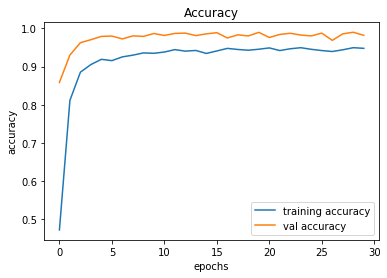

In [19]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

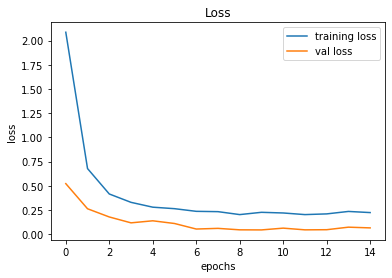

In [14]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
#testing accuracy on test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
data=[]
imgs=y_test['Path']
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [23]:
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
print(accuracy_score(labels, pred))
model.save('traffic_classifier.h5')

0.9517814726840855
